## Time Series Forecasting of Hourly Energy Consumption by Using XGBoost

In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#for modeling
import xgboost as xgb
from sklearn.metrics import mean_squared_error
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

In [104]:
df = pd.read_csv("C:/Users/prade/OneDrive/Desktop/Python/projects/Datasets/PJME_hourly/PJME_hourly.csv")

In [105]:
df.head()

,Datetime,PJME_MW
0,2002-12-31 01:00:00,26498.0
1,2002-12-31 02:00:00,25147.0
2,2002-12-31 03:00:00,24574.0
3,2002-12-31 04:00:00,24393.0
4,2002-12-31 05:00:00,24860.0


In [106]:
df.tail()

,Datetime,PJME_MW
145361,2018-01-01 20:00:00,44284.0
145362,2018-01-01 21:00:00,43751.0
145363,2018-01-01 22:00:00,42402.0
145364,2018-01-01 23:00:00,40164.0
145365,2018-01-02 00:00:00,38608.0


In [107]:
df = df.set_index('Datetime')
df

,PJME_MW
Datetime,
2002-12-31 01:00:00,26498.0
2002-12-31 02:00:00,25147.0
2002-12-31 03:00:00,24574.0
2002-12-31 04:00:00,24393.0
2002-12-31 05:00:00,24860.0
...,...
2018-01-01 20:00:00,44284.0
2018-01-01 21:00:00,43751.0
2018-01-01 22:00:00,42402.0


In [108]:
df.index = pd.to_datetime(df.index)

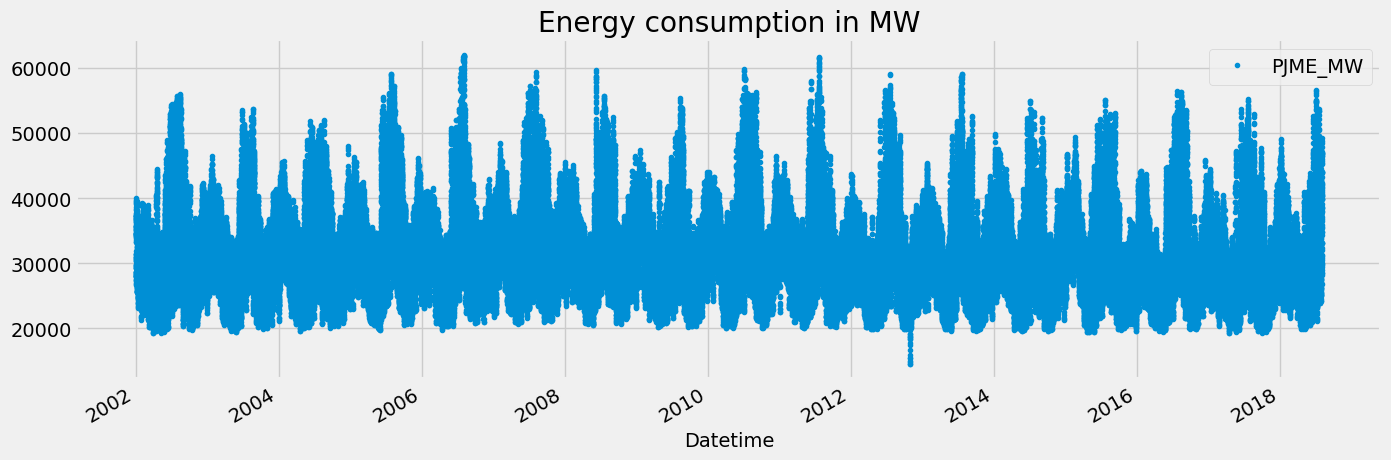

In [109]:
#initial visualization of the data
df.plot(style = '.', 
        figsize = (15,5), 
        color = color_pal[0], 
        title = 'Energy consumption in MW')
plt.show()

# Train / Test Split

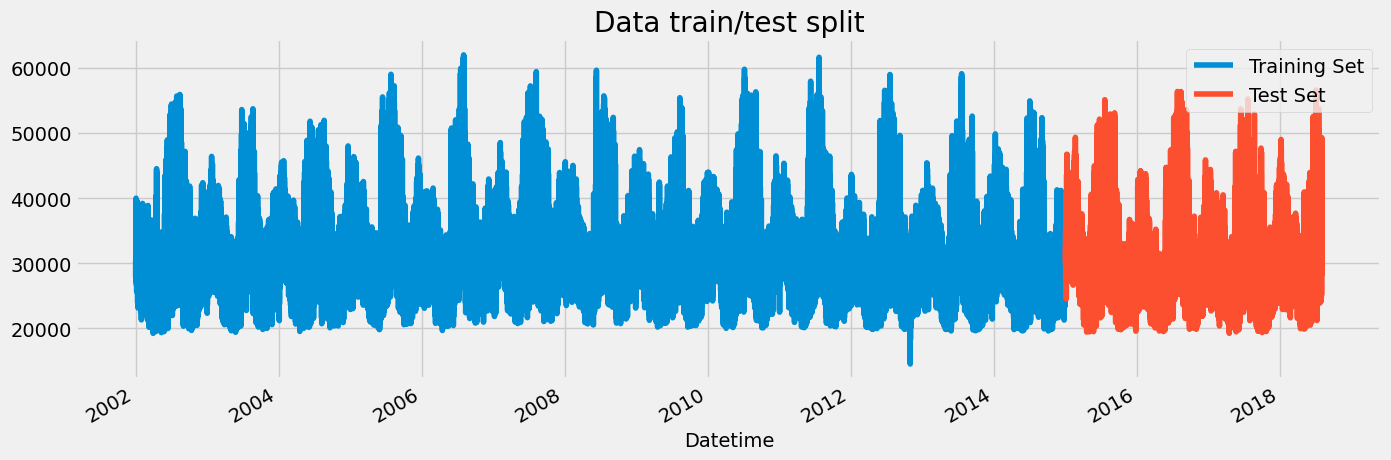

In [110]:
train = df.loc[df.index < '01-01-2015']
test = df.loc[df.index >= '01-01-2015']

fig, ax = plt.subplots(figsize = (15, 5))
train.plot(ax = ax, label = 'Training Set', title = "Data train/test split")
test.plot(ax = ax, label = 'Test Set')
#ax.axvline('2015-01-01', color = 'black', linestyle = '--')
ax.legend(['Training Set', 'Test Set'])
plt.show()

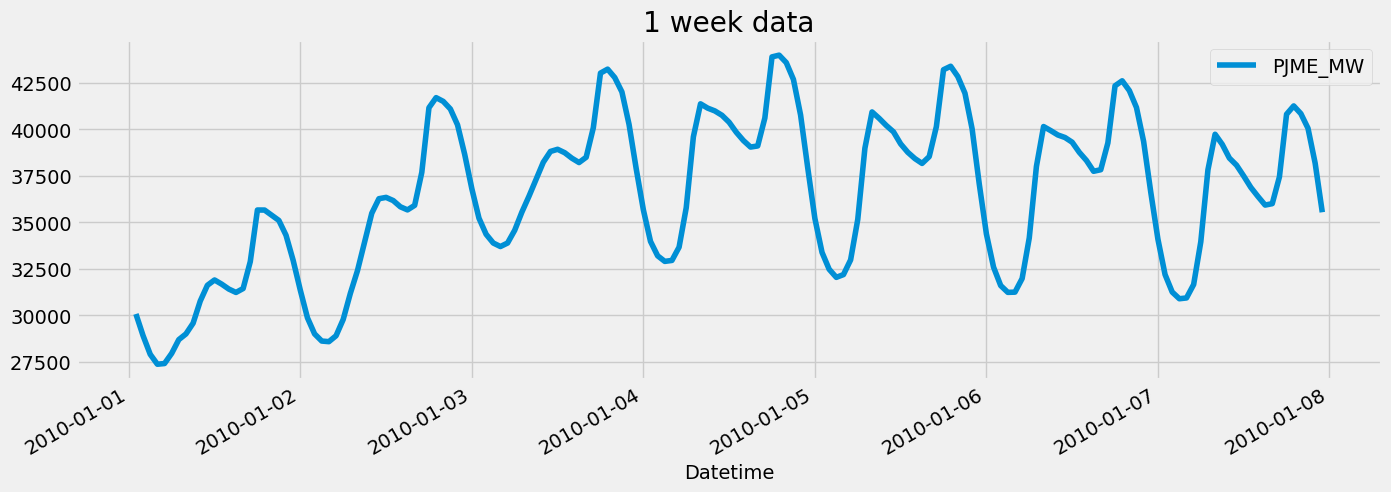

In [111]:
# observing 1 week data
df.loc[(df.index > '01-01-2010') & (df.index < '01-08-2010')].plot(figsize = (15,5), title = '1 week data')
plt.show()

# Feature Creation

In [112]:
def create_feature(df):
    """ 
    Create time series features based on time series index.
    """
    df["hour"] = df.index.hour
    df['dayofweek'] = df.index.day_of_week
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofyear'] = df.index.day_of_year
    return df

In [113]:
df = create_feature(df)

# visualize feature / target relationship

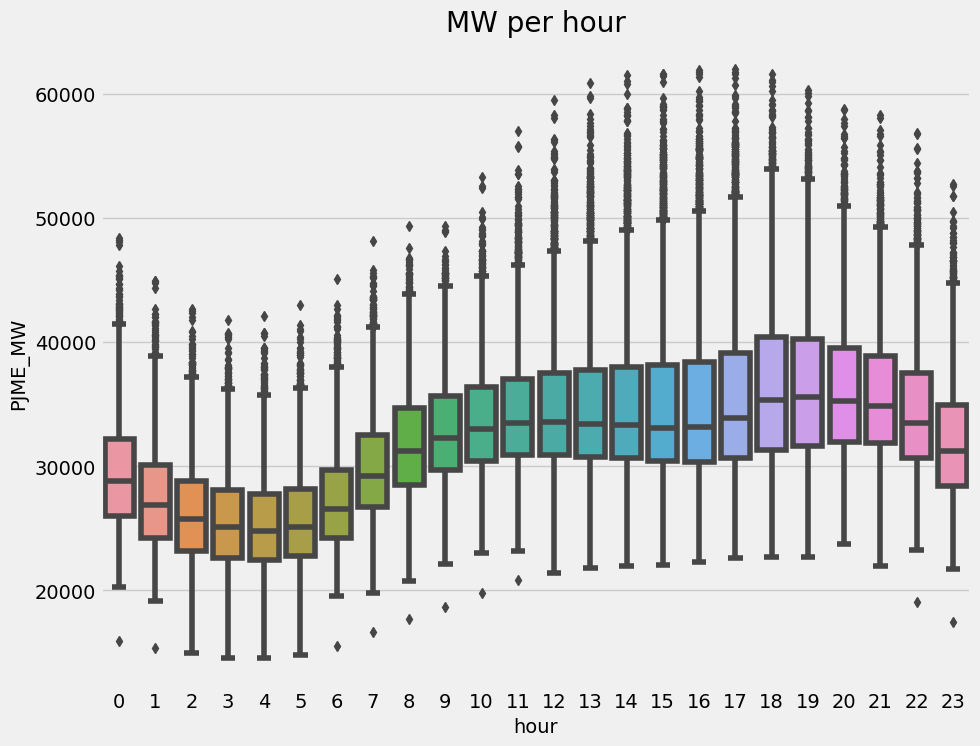

In [114]:
fig, ax = plt.subplots(figsize = (10,8))
sns.boxplot(data=df, x='hour', y='PJME_MW')
ax.set_title('MW per hour')
plt.show()

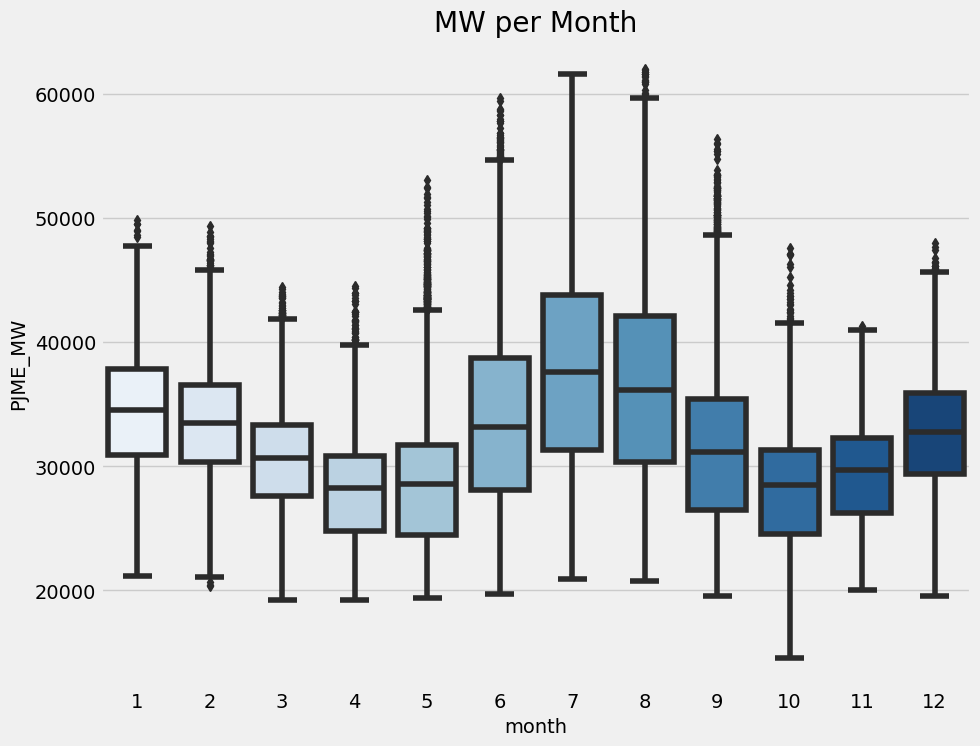

In [115]:
fig, ax = plt.subplots(figsize = (10,8))
sns.boxplot(data=df, x='month', y='PJME_MW', palette='Blues')
ax.set_title('MW per Month')
plt.show()

# Creating the model